In [5]:
texto = []

f = open('/discurso_mlutherking.txt','r')

for line in f:
   texto.append(line)

   for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('"','')
    texto[i] = texto[i].replace(':','')
    texto[i] = texto[i].replace('!','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('?','')

print(texto)
 

['estou feliz por estar hoje com vocês num evento que entrará para a história como a maior demonstração pela liberdade na história de nosso país', 'há cem anos um grande americano sob cuja simbólica sombra nos encontramos assinou a proclamação da emancipação esse decreto fundamental foi como um grande raio de luz de esperança para milhões de escravos negros que tinham sido marcados a ferro nas chamas de uma vergonhosa injustiça veio como uma aurora feliz para pôr fim à longa noite de cativeiro', 'mas cem anos mais tarde devemos encarar a trágica realidade de que o negro ainda não é livre cem anos mais tarde a vida do negro está ainda infelizmente dilacerada pelas algemas da segregação e pelas correntes da discriminação', 'cem anos mais tarde o negro ainda vive numa ilha isolada de pobreza no meio de um vasto oceano de prosperidade material cem anos mais tarde o negro ainda definha nas margens da sociedade americana estando exilado em sua própria terra por isso encontramo-nos aqui hoje 

In [10]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
print(texto)

['estou feliz por estar hoje com vocês num evento que entrará para a história como a maior demonstração pela liberdade na história de nosso país', 'há cem anos um grande americano sob cuja simbólica sombra nos encontramos assinou a proclamação da emancipação esse decreto fundamental foi como um grande raio de luz de esperança para milhões de escravos negros que tinham sido marcados a ferro nas chamas de uma vergonhosa injustiça veio como uma aurora feliz para pôr fim à longa noite de cativeiro', 'mas cem anos mais tarde devemos encarar a trágica realidade de que o negro ainda não é livre cem anos mais tarde a vida do negro está ainda infelizmente dilacerada pelas algemas da segregação e pelas correntes da discriminação', 'cem anos mais tarde o negro ainda vive numa ilha isolada de pobreza no meio de um vasto oceano de prosperidade material cem anos mais tarde o negro ainda definha nas margens da sociedade americana estando exilado em sua própria terra por isso encontramo-nos aqui hoje 

In [11]:
for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(list(mydict.items())[:100])

[('e', 7), ('quando', 3), ('isso', 1), ('acontecer', 1), ('permitirmos', 1), ('que', 2), ('a', 3), ('liberdade', 1), ('ressoe', 1), ('deixarmos', 1), ('ressoar', 1), ('de', 4), ('cada', 4), ('vila', 1), ('lugar', 1), ('estado', 1), ('cidade', 1), ('seremos', 1), ('capazes', 1), ('fazer', 1), ('chegar', 1), ('mais', 1), ('rápido', 1), ('o', 1), ('dia', 1), ('em', 1), ('todos', 1), ('os', 1), ('filhos', 1), ('deus', 2), ('negros', 1), ('brancos', 1), ('judeus', 1), ('gentios', 1), ('protestantes', 1), ('católicos', 1), ('poderão', 1), ('dar-se', 1), ('as', 2), ('mãos', 1), ('cantar', 1), ('palavras', 1), ('da', 1), ('antiga', 1), ('canção', 1), ('espiritual', 1), ('negra', 1), ('finalmente', 3), ('livres', 3), ('graças', 1), ('todo', 1), ('poderoso', 1), ('somos', 1)]


In [12]:
import pandas as pd
df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)

In [13]:
df = df.sort_values('count',ascending=False).reset_index(drop=True)
df.head()

,word,count
0,e,7
1,de,4
2,cada,4
3,finalmente,3
4,quando,3


In [14]:
import numpy as np
df['count'].replace(-np.Inf,0)

0     7
1     4
2     4
3     3
4     3
5     3
6     3
7     2
8     2
9     2
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
Name: count, dtype: int64

In [15]:
import numpy as np
df['log_count'] = np.log(df['count'])
df['log_rank'] = np.log(df.index)
df['log_rank'].replace(-np.Inf,0,inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


,word,count,log_count,log_rank
0,e,7,1.945910,0.000000
1,de,4,1.386294,0.000000
2,cada,4,1.386294,0.693147
3,finalmente,3,1.098612,1.098612
4,quando,3,1.098612,1.386294


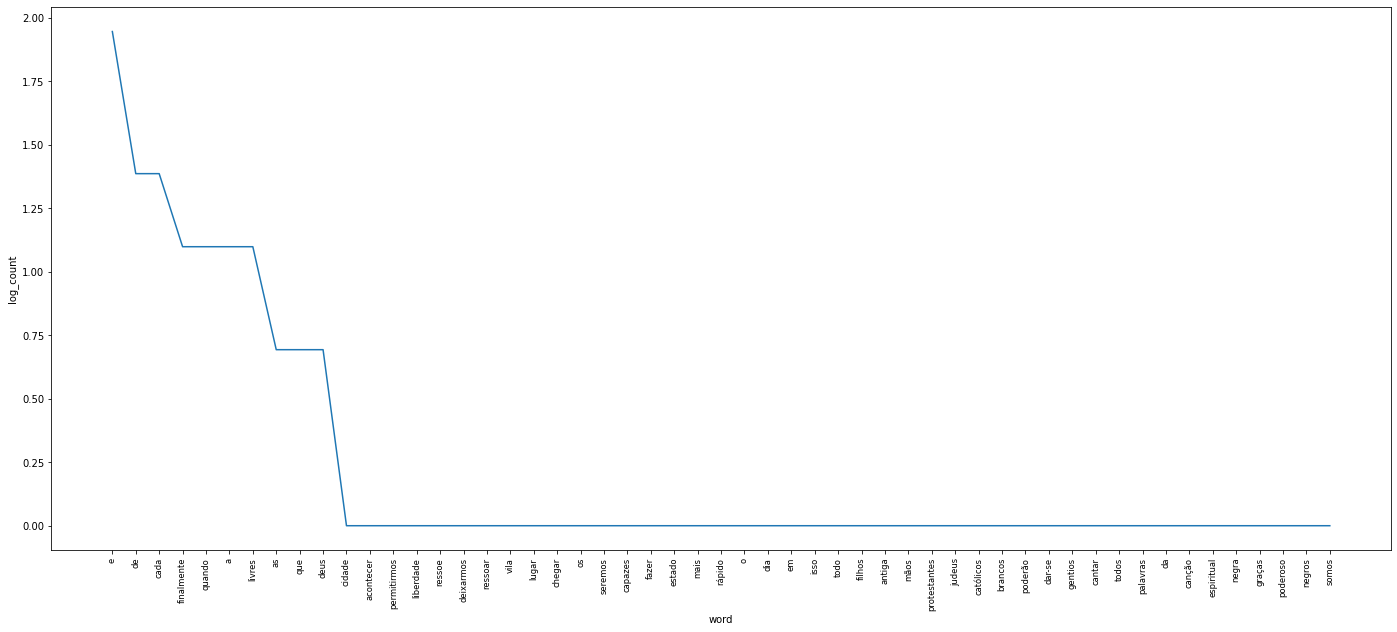

In [17]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# plt.bar(height=df['log_count'])

plt.figure(figsize=(24,10))
sns.lineplot(x=df[df['count'] > 0].word,y=df[df['count'] > 0]['log_count'])
plt.xticks(rotation=90,fontsize='small') 

plt.show()